## Base de datos
La base de datos a ser utilizada es la [Acoustic path database for ANC in-ear headphone development](https://www.iks.rwth-aachen.de/forschung/tools-downloads/databases/paths-for-active-noise-cancellation-development-and-research) de la universidad de Aachen, Alemania.

Proveen mediciones del "Electronic Backend", que es la respuesta en frecuencia del conjunto ADC-DAC y filtrado anti-alias.

Miden en dos lugares, una cabina acústica (Acoustic Booth) y una cámara semi-anecoica.

$f_s = 48kHz$, 194400 muestras, 4.05 segundos de sweep logarítmico.




In [4]:
import json

In [5]:
import numpy as np

In [6]:
from scipy import signal

In [7]:
import matplotlib.pyplot as plt

In [57]:
def plot_frequency_responses(coeffs, labels, fs):
    """ Plot the frequency responses of the given FIR coefficients.
        @param coeffs  List of filter coefficients
        @param labels  List of labels for each plot
        @param fs Sampling frequency
    """
    
    N = len(coeffs)
    
    # Configure plot
    plt.figure(figsize=(8,4))
    plt.ylabel('Amplitud [dB]', fontsize=16)
    plt.xlabel('Frecuencia [kHz]', fontsize=16)
    plt.grid()

    for k in range(N):
        # Calculate frequency response
        freq, H = signal.freqz(coeffs[k], [1.0], fs=fs)
        # Plot
        plt.plot(freq / 1e3, 20*np.log10(np.abs(H)), label=labels[k])

    if labels[0]:
        plt.legend(fontsize=13)
    plt.show()

In [9]:
database_path = "../../PANDAR_database_1.0/BoseQC20/processed_data.json"

In [10]:
with open(database_path) as f:
    data = json.load(f)

print(len(data['acoustic_booth'][0]['P'][1]))
print(len(data['anechoic_chamber']['primary'][0][1]))

8192
8192


In [23]:
fs = 48000
# Obtain single acoustic system measurement
meas_idx = 0

acoustic_system = data['acoustic_booth'][meas_idx]


# Obtain each path's impulse response
# Only left channel will be used from now on
primary_path = np.array(acoustic_system['P'][0])
secondary_path = np.array(acoustic_system['G'][0])
feedback_path = np.array(acoustic_system['F'][0])

print(f'Campos del sistema acústico: {acoustic_system.keys()}')
print(f'Longitud: {len(primary_path)} muestras')

Campos del sistema acústico: dict_keys(['P', 'G', 'F'])
Longitud: 8192 muestras


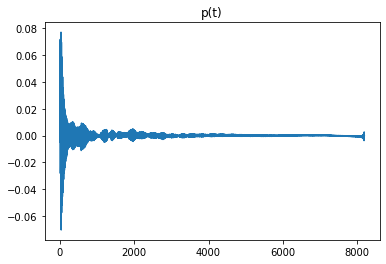

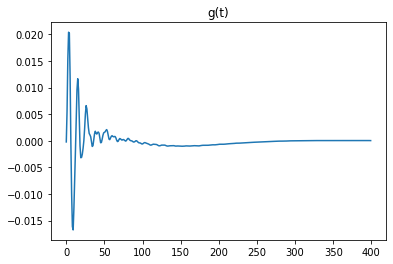

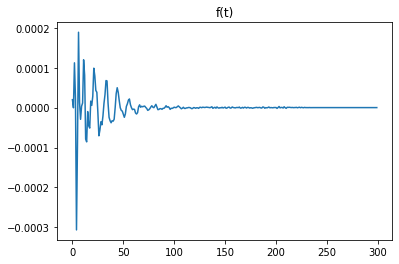

In [30]:
plt.title('p(t)')
plt.plot(primary_path)
plt.figure()
plt.title('g(t)')
plt.plot(secondary_path[0:400])
plt.figure()
plt.title('f(t)')
plt.plot(feedback_path[0:300])
plt.show()

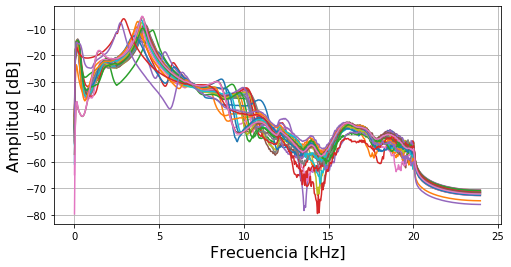

In [58]:
# Observamos respuestas en frecuencia de G
N = 27
sec_paths = [ np.array(data['acoustic_booth'][k]['G'][0]) for k in range(N)]
labels = [ f'' for k in range(N)]
plot_frequency_responses(sec_paths, labels, fs)

Vemos que un gran número de mediciones tienen el pico ubicado alrededor de $4kHz$.

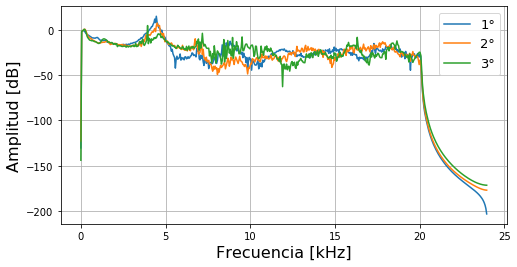

In [55]:
# Observamos respuestas en frecuencia de P
N = 27
indexes = range(N) # [0, 1, 2]
sec_paths = [ np.array(data['acoustic_booth'][k]['P'][0]) for k in indexes]
labels = [ f'{k+1}°' for k in indexes]
plot_frequency_responses(sec_paths, labels=None, fs)

In [34]:
# Obtain anechoic chamber measurement
# Only left channel will be used
anechoic_system = data['anechoic_chamber']
secondary_anec_path = np.array(anechoic_system['secondary'][0])
feedback_anec_path = np.array(anechoic_system['feedback'][0])

meas_idx = 0

# Obtain each path's impulse response
primary_anec_path = np.array(anechoic_system['primary'][meas_idx][0])

print(f'Campos del sistema acústico: {anechoic_system.keys()}')
print(f'Longitud: {len(primary_anec_path)} muestras')

Campos del sistema acústico: dict_keys(['primary', 'secondary', 'feedback'])
Longitud: 8192 muestras


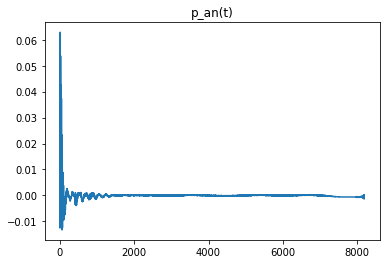

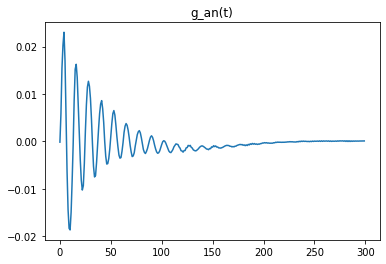

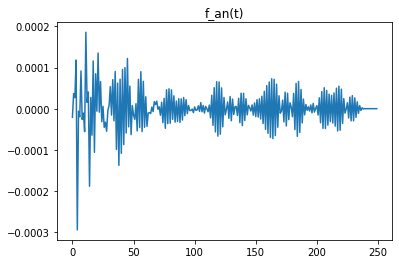

In [41]:
plt.title('p_an(t)')
plt.plot(primary_anec_path)
plt.figure()
plt.title('g_an(t)')
plt.plot(secondary_anec_path[:300])
plt.figure()
plt.title('f_an(t)')
plt.plot(feedback_anec_path[:250])
plt.show()